In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Step 1: Data Collection and Inspection


In [2]:
file_path = "messy_customer_sales_data.csv"
df = pd.read_csv(file_path)
print("Shape (rows, cols):", df.shape)
print("Columns:", df.columns.to_list())

Shape (rows, cols): (10200, 12)
Columns: ['Customer_ID', 'Name', 'Gender', 'Age', 'City', 'Signup_Date', 'Last_Purchase_Date', 'Purchase_Amount', 'Feedback_Score', 'Email', 'Phone_Number', 'Country']


In [3]:
# first 5 rows
df.head()

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52.0,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62.0,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40.0,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41.0,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India


In [4]:
# last 5 rows
df.tail()

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
10195,CUST10767,Robert Lewis,female,35.0 years,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10196,NaN,Diane Evans,M,53.0,bangalore,2023-12-31,2025-05-07,11639.0,7.0,lisadennis@example.net,5200349941,IND
10197,CUST6315,Joshua Martinez,m,25.0,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55.0,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia
10199,CUST6588,David Potter,female,34.0,HYDERABAD,2020-10-12,2025-06-27,35211.0,10.0,kochjonathan@example.org,1926206725,India


In [5]:
# data types and null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9177 non-null   object 
 1   Name                10200 non-null  object 
 2   Gender              9174 non-null   object 
 3   Age                 9249 non-null   object 
 4   City                9184 non-null   object 
 5   Signup_Date         10200 non-null  object 
 6   Last_Purchase_Date  9188 non-null   object 
 7   Purchase_Amount     9179 non-null   float64
 8   Feedback_Score      9177 non-null   float64
 9   Email               10200 non-null  object 
 10  Phone_Number        10200 non-null  int64  
 11  Country             9468 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


In [6]:
# summary statistics
df.describe().round(2)

,Purchase_Amount,Feedback_Score,Phone_Number
count,9179.00,9177.00,1.020000e+04
mean,29090.13,5.48,4.979974e+09
std,208697.09,2.87,2.902593e+09
min,-500.00,1.00,9.208990e+05
25%,12295.00,3.00,2.449157e+09
50%,24330.00,5.00,4.988639e+09
75%,37130.00,8.00,7.510448e+09
max,9999999.00,10.00,9.994402e+09


In [7]:
# Missing values summary
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df) * 100).round(2)
missing_summary = pd.concat([missing_count, missing_percent], axis=1)
missing_summary.columns = ['missing_count', 'missing_percent']
print(missing_summary.sort_values('missing_percent', ascending=False).to_string())

                    missing_count  missing_percent
Gender                       1026            10.06
Customer_ID                  1023            10.03
Feedback_Score               1023            10.03
Purchase_Amount              1021            10.01
City                         1016             9.96
Last_Purchase_Date           1012             9.92
Age                           951             9.32
Country                       732             7.18
Name                            0             0.00
Signup_Date                     0             0.00
Email                           0             0.00
Phone_Number                    0             0.00


In [8]:
# if we directly do dropna all the rows will be remove
df.dropna().shape

(4528, 12)

In [9]:
# duplicate rows summary
print('Duplicate Rows Count:', df[df.duplicated()].shape[0])

Duplicate Rows Count: 15


In [10]:
# Duplicate key check (Customer_ID)
df['Customer_ID'].value_counts()

Customer_ID
CUST3374     2
CUST7749     2
CUST10800    2
CUST6588     2
CUST9062     2
            ..
CUST10204    1
CUST4647     1
CUST9548     1
CUST9966     1
CUST4812     1
Name: count, Length: 9000, dtype: int64

In [11]:
df

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52.0,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62.0,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40.0,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41.0,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10195,CUST10767,Robert Lewis,female,35.0 years,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10196,NaN,Diane Evans,M,53.0,bangalore,2023-12-31,2025-05-07,11639.0,7.0,lisadennis@example.net,5200349941,IND
10197,CUST6315,Joshua Martinez,m,25.0,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55.0,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


In [12]:
# category count
for col in df.columns:
    if df[col].nunique()<20:
        print(df[col].value_counts())
        print('-'*50)

Gender
f         1184
M         1171
m         1163
F         1157
MALE      1131
female    1128
male      1121
FEMALE    1119
Name: count, dtype: int64
--------------------------------------------------
City
 Kolkata       820
 Mumbai        812
 Chennai       784
 Bangalore     773
 Hyderabad     770
 Delhi         763
 CHENNAI       404
 KOLKATA       395
 MUMBAI        393
 hyderabad     384
 bangalore     383
 DELHI         378
 delhi         369
 BANGALORE     363
 HYDERABAD     360
 mumbai        352
 chennai       343
 kolkata       338
Name: count, dtype: int64
--------------------------------------------------
Feedback_Score
2.0     952
4.0     947
7.0     938
6.0     927
3.0     913
8.0     912
1.0     907
9.0     903
10.0    901
5.0     877
Name: count, dtype: int64
--------------------------------------------------
Country
India    7132
IND       793
india     772
InDia     771
Name: count, dtype: int64
--------------------------------------------------


# Step 2: Handling Missing Data


In [13]:
# Make a copy to keep original data safe
df_clean = df.copy()

# Drop rows with missing 'Customer_ID' (unique identifier)
df_clean = df_clean.dropna(subset=['Customer_ID'])
df_clean.shape

(9177, 12)

In [14]:
df_clean['Age'].unique()

array(['52.0', '51.0 years', '62.0', '40.0', '41.0', nan, '18.0',
       '43.0 years', '40.0 years', '26.0', '32.0', '22.0', '59.0', '65.0',
       '61.0', '31.0', '54.0 years', '55.0', '69.0', '61.0 years', '24.0',
       '63.0', '19.0', '50.0', '56.0', '36.0', '68.0', '43.0', '38.0',
       '27.0', '57.0 years', '23.0', '25.0', '66.0', '28.0', '30.0',
       '46.0', '48.0', '20.0', '37.0', '67.0', '51.0', '35.0', '58.0',
       '29.0', 'nan years', '39.0', '49.0', '47.0', '42.0', '44.0',
       '64.0', '53.0', '60.0', '59.0 years', '45.0', '21.0', '34.0',
       '54.0', '48.0 years', '46.0 years', '33.0', '57.0', '30.0 years',
       '58.0 years', '35.0 years', '34.0 years', '69.0 years', '250',
       '19.0 years', '27.0 years', '53.0 years', '65.0 years',
       '66.0 years', '44.0 years', '49.0 years', '25.0 years',
       '23.0 years', '62.0 years', '41.0 years', '33.0 years',
       '28.0 years', '22.0 years', '20.0 years', '42.0 years',
       '45.0 years', '3', '63.0 years', '

In [15]:
def extract_age(age):
    age_num = re.findall('[0-9]+',str(age))
    if len(age_num) > 0:
        return age_num[0]
    else:
        return age

In [472]:
df_clean['Age'] = df_clean['Age'].apply(lambda x : extract_age(x))
df_clean

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10194,CUST6146,Cody Thompson,f,40,NaN,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,female,35,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10197,CUST6315,Joshua Martinez,m,25,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


In [473]:
age_df = df_clean[df_clean['Age']!='nan years'].dropna()['Age']
age_median = int(age_df.astype('int64').median())

In [474]:
# replace nan with median age and extracting numbers 
df_clean['Age'].replace('nan years',age_median, inplace = True)

In [478]:
# Fill numerical columns with median
df_clean['Age'].fillna(age_median, inplace=True)
df_clean['Purchase_Amount'].fillna(df_clean['Purchase_Amount'].median(), inplace = True)

# Fill categorical columns with mode
cat_cols = ['Gender', 'City', 'Country','Feedback_Score']
for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Forward Fill datetime column
df_clean['Last_Purchase_Date'].ffill(inplace = True)
df_clean

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51,Kolkata,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41,CHENNAI,2024-04-05,2024-12-15,24268.0,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10194,CUST6146,Cody Thompson,f,40,Kolkata,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,female,35,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10197,CUST6315,Joshua Martinez,m,25,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55,Kolkata,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


# Step 3: Fixing Inconsistent Formatting


In [479]:
df_clean['City'] = df_clean['City'].str.strip().str.capitalize()

df_clean['Gender'].replace({'m ':'Male', 'M':'Male','F':'Female','f ': 'Female'}, inplace = True)
df_clean['Gender'] = df_clean['Gender'].str.capitalize()

df_clean['Country'].replace({'IND':'India'}, inplace = True)
df_clean['Country'] = df_clean['Country'].str.capitalize()

# Step 4: Handling Duplicates

In [480]:
df_clean = df_clean.drop_duplicates(keep='first')
df_clean.shape

(9014, 12)

In [481]:
df_clean['Customer_ID'].value_counts()

Customer_ID
CUST9534    2
CUST4196    2
CUST5341    2
CUST2510    2
CUST1002    2
           ..
CUST7618    1
CUST2436    1
CUST5982    1
CUST5432    1
CUST4812    1
Name: count, Length: 9000, dtype: int64

In [482]:
# Check duplicates based on Customer_ID (primary key)
partial_duplicates = df_clean[df_clean.duplicated(subset=['Customer_ID'], keep=False)]
print(f"🔍 Partial Duplicates (Customer ID): {partial_duplicates.shape[0]}")

partial_duplicates.sort_values(by='Customer_ID').head(10)

🔍 Partial Duplicates (Customer ID): 28


,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
8155,CUST1002,Angie Henderson,Female,46,Delhi,2022-09-28,2025-08-25,35963.0,2.0,houstonalexis@example.org,5052686676,India
2430,CUST1002,Angie Henderson,Female,46,Delhi,2022-09-28,2025-08-09,35963.0,2.0,houstonalexis@example.org,5052686676,India
9656,CUST10236,Brittney Boyd,Male,19,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,India
6615,CUST10236,Brittney Boyd,Male,250,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,India
1914,CUST2510,Henry Taylor,Female,29,Bangalore,2021-06-09,2025-06-14,24268.0,2.0,woodwilliam@example.com,6090100995,India
2242,CUST2510,Henry Taylor,Female,29,Bangalore,2021-06-09,2024-10-23,24268.0,2.0,woodwilliam@example.com,6090100995,India
8273,CUST2905,Judith Miller,Female,44,Kolkata,2025-03-26,2024-11-15,43693.0,8.0,kmurphy@example.net,324890056,India
5498,CUST2905,Judith Miller,Female,44,Kolkata,2025-03-26,2025-06-30,43693.0,8.0,kmurphy@example.net,324890056,India
9183,CUST3484,Jose Hartman,Female,3,Kolkata,2025-07-06,2025-01-14,21446.0,2.0,coryadams@example.net,5973791231,India
8411,CUST3484,Jose Hartman,Female,56,Kolkata,2025-07-06,2025-01-14,21446.0,2.0,coryadams@example.net,5973791231,India


In [483]:
df_clean = df_clean.drop_duplicates(subset=['Customer_ID'], keep='first')
df_clean.shape

(9000, 12)

# Step 5: Correcting Data Types


In [484]:
# convert data types
df_clean['Signup_Date'] = pd.to_datetime(df_clean['Signup_Date'])
df_clean['Last_Purchase_Date'] = pd.to_datetime(df_clean['Last_Purchase_Date'])
df_clean['Age'] = df_clean['Age'].astype('int64')
df_clean.dtypes

Customer_ID                   object
Name                          object
Gender                        object
Age                            int64
City                          object
Signup_Date           datetime64[ns]
Last_Purchase_Date    datetime64[ns]
Purchase_Amount              float64
Feedback_Score               float64
Email                         object
Phone_Number                   int64
Country                       object
dtype: object

# Step 6: Handling Outliers

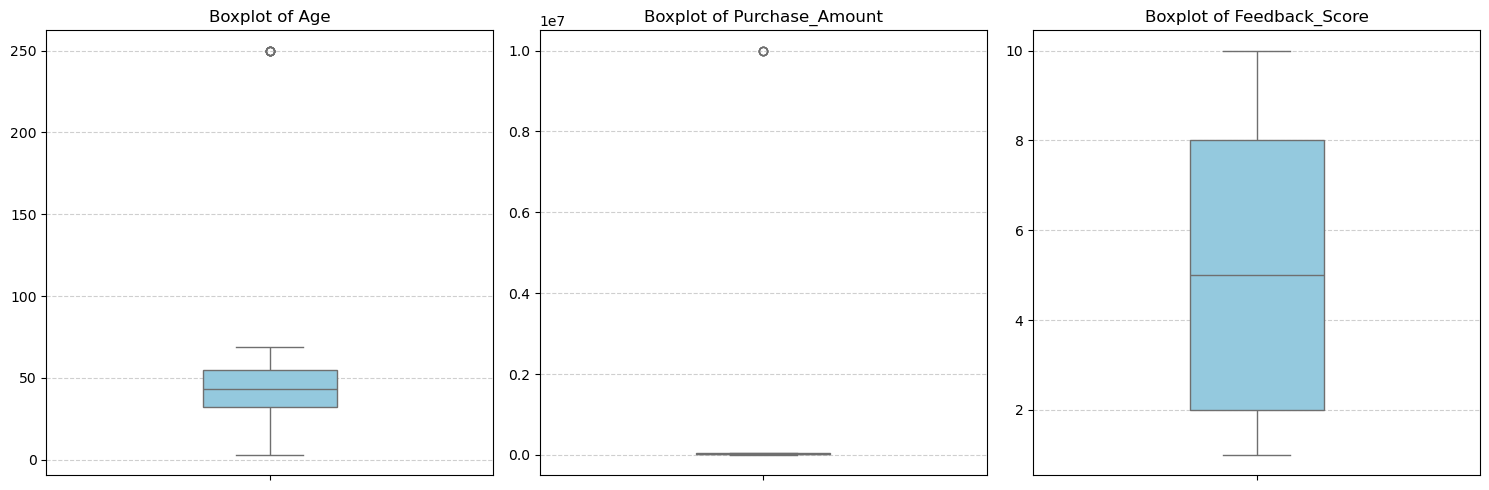

In [485]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_clean[col], color='skyblue', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [486]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_clean[['Age', 'Purchase_Amount', 'Feedback_Score']]))

# Identify outliers (any row with z > 3)
outlier_mask = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected (Z-score method): {outlier_mask.sum()}")

# Display sample outliers
df_clean[outlier_mask]

Number of outliers detected (Z-score method): 11


,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
470,CUST6977,Tyler Stout,Female,250,Chennai,2022-05-21,2025-05-31,3554.0,2.0,hudsonsandra@example.net,5752427586,India
932,CUST1207,Cathy Robinson,Female,250,Delhi,2024-10-24,2025-10-01,23012.0,6.0,jefftaylor@example.org,1244788430,India
2383,CUST3987,Erica Johnson,Male,47,Kolkata,2020-11-03,2025-08-10,9999999.0,5.0,bflowers@example.com,747807729,India
3368,CUST7314,Gavin Yates,Male,50,Bangalore,2022-06-30,2025-03-22,9999999.0,10.0,millermichael@example.com,1481715956,India
4674,CUST8481,Denise Combs,Female,62,Mumbai,2024-10-06,2025-07-08,9999999.0,3.0,cmorales@example.net,2931912910,India
4692,CUST10561,Richard Brown,Female,58,Mumbai,2024-04-13,2025-09-08,9999999.0,2.0,kevintaylor@example.net,7047881855,India
5279,CUST4536,Alexandra Ramos,Male,250,Chennai,2021-09-30,2025-03-03,3296.0,10.0,drakemichelle@example.org,5651607326,India
5949,CUST7041,Joseph Young,Male,250,Delhi,2022-01-20,2024-11-26,1131.0,8.0,pmckenzie@example.org,9456700786,India
6085,CUST8110,Betty Cole,Female,250,Bangalore,2024-01-07,2025-04-12,25974.0,1.0,dmitchell@example.net,366613689,India
6615,CUST10236,Brittney Boyd,Male,250,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,India


In [487]:
df_clean = df_clean[~outlier_mask]

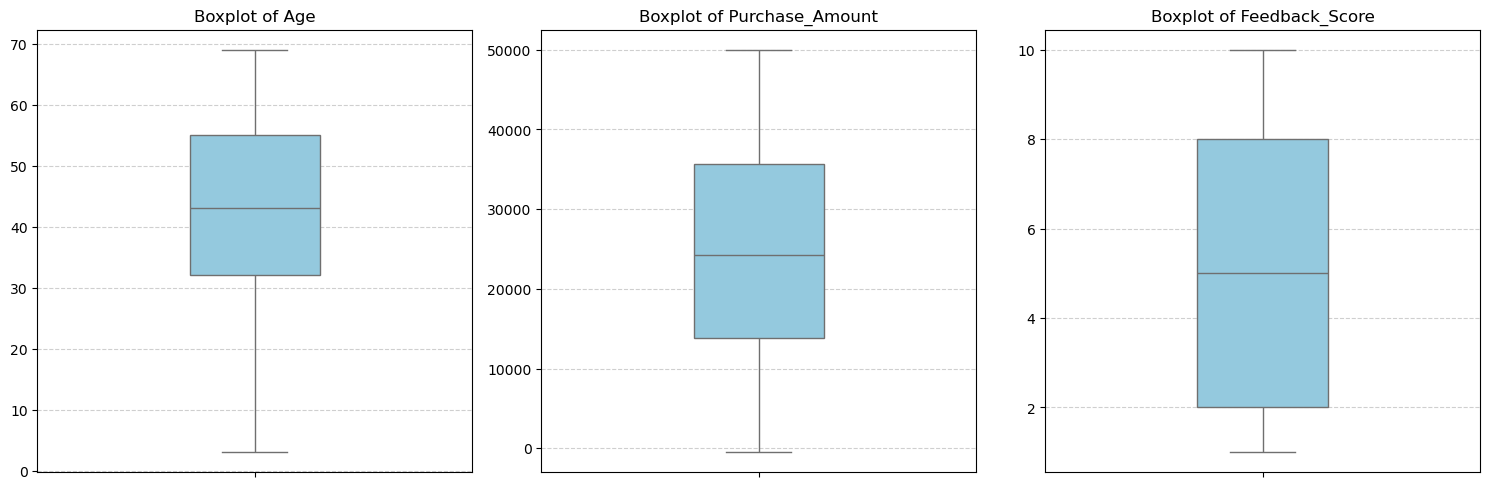

In [488]:
cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_clean[col], color='skyblue', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()